In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("product details.csv")
df2 = pd.read_csv("products catalog.csv")
print(df1.shape)
print(df2.shape)

(12491, 3)
(12491, 6)


In [3]:
df1.head()

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx


In [4]:
df2.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown


In [5]:
df1.ProductID.nunique()

12491

In [6]:
df2.ID.nunique()

12491

In [7]:
df = pd.merge(df1,df2, left_on= 'ProductID', right_on= 'ID')
df.shape

(12491, 9)

In [8]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,10017413,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,10016283,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,10009781,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,10015921,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,10017833,"Brown and off-white printed casual shirt, has ...",White


In [9]:
df.drop("ID", axis = 1, inplace = True)
df.head()
df.shape

(12491, 8)

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(12491, 8)

In [11]:
df.isna().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [12]:
df.describe(include = 'all')

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
count,1.249100e+04,12491,12491,12491,12491.000000,12491.000000,12491,11597
unique,NaN,10761,677,6,NaN,NaN,10435,27
top,NaN,Parx Men Blue Slim Fit Checked Casual Shirt,Indian Terrain,Women,NaN,NaN,"Blue medium wash 5-pocket mid-rise jeans, clea...",Blue
freq,NaN,16,971,5126,NaN,NaN,54,3443
mean,9.917160e+06,NaN,NaN,NaN,1452.660956,4.913698,NaN,NaN
std,1.438006e+06,NaN,NaN,NaN,2118.503976,1.092333,NaN,NaN
min,1.012060e+05,NaN,NaN,NaN,90.000000,1.000000,NaN,NaN
25%,1.006215e+07,NaN,NaN,NaN,649.000000,5.000000,NaN,NaN
50%,1.015463e+07,NaN,NaN,NaN,920.000000,5.000000,NaN,NaN
75%,1.021565e+07,NaN,NaN,NaN,1499.000000,5.000000,NaN,NaN


In [13]:
df.PrimaryColor.unique()

array([' Black', ' Beige', ' Pink', 'Blue', ' White', ' Brown',
       ' Burgundy', ' Red', ' Green', nan, ' Maroon', ' Navy', ' Gold',
       ' Yellow', ' Grey', ' Platinum', ' Silver', ' Khaki', ' Mustard',
       ' Lavender', ' Matte', ' Rose', ' Charcoal', ' Purple', ' Orange',
       ' Peach', ' Magenta', ' Bronze'], dtype=object)

In [14]:
df["PrimaryColor"] = (df["PrimaryColor"].apply(lambda x : str(x).strip()))
df.PrimaryColor.unique()

array(['Black', 'Beige', 'Pink', 'Blue', 'White', 'Brown', 'Burgundy',
       'Red', 'Green', 'nan', 'Maroon', 'Navy', 'Gold', 'Yellow', 'Grey',
       'Platinum', 'Silver', 'Khaki', 'Mustard', 'Lavender', 'Matte',
       'Rose', 'Charcoal', 'Purple', 'Orange', 'Peach', 'Magenta',
       'Bronze'], dtype=object)

In [15]:
df["PrimaryColor"].value_counts().sort_values(ascending=False)

Blue        3443
Black       1640
Red         1543
Green        908
nan          894
White        880
Grey         684
Brown        473
Yellow       406
Pink         391
Gold         236
Beige        236
Maroon       187
Orange       130
Silver       111
Purple        65
Burgundy      64
Khaki         56
Navy          54
Lavender      19
Matte         17
Mustard       15
Magenta       13
Charcoal      10
Rose           8
Platinum       3
Bronze         3
Peach          2
Name: PrimaryColor, dtype: int64

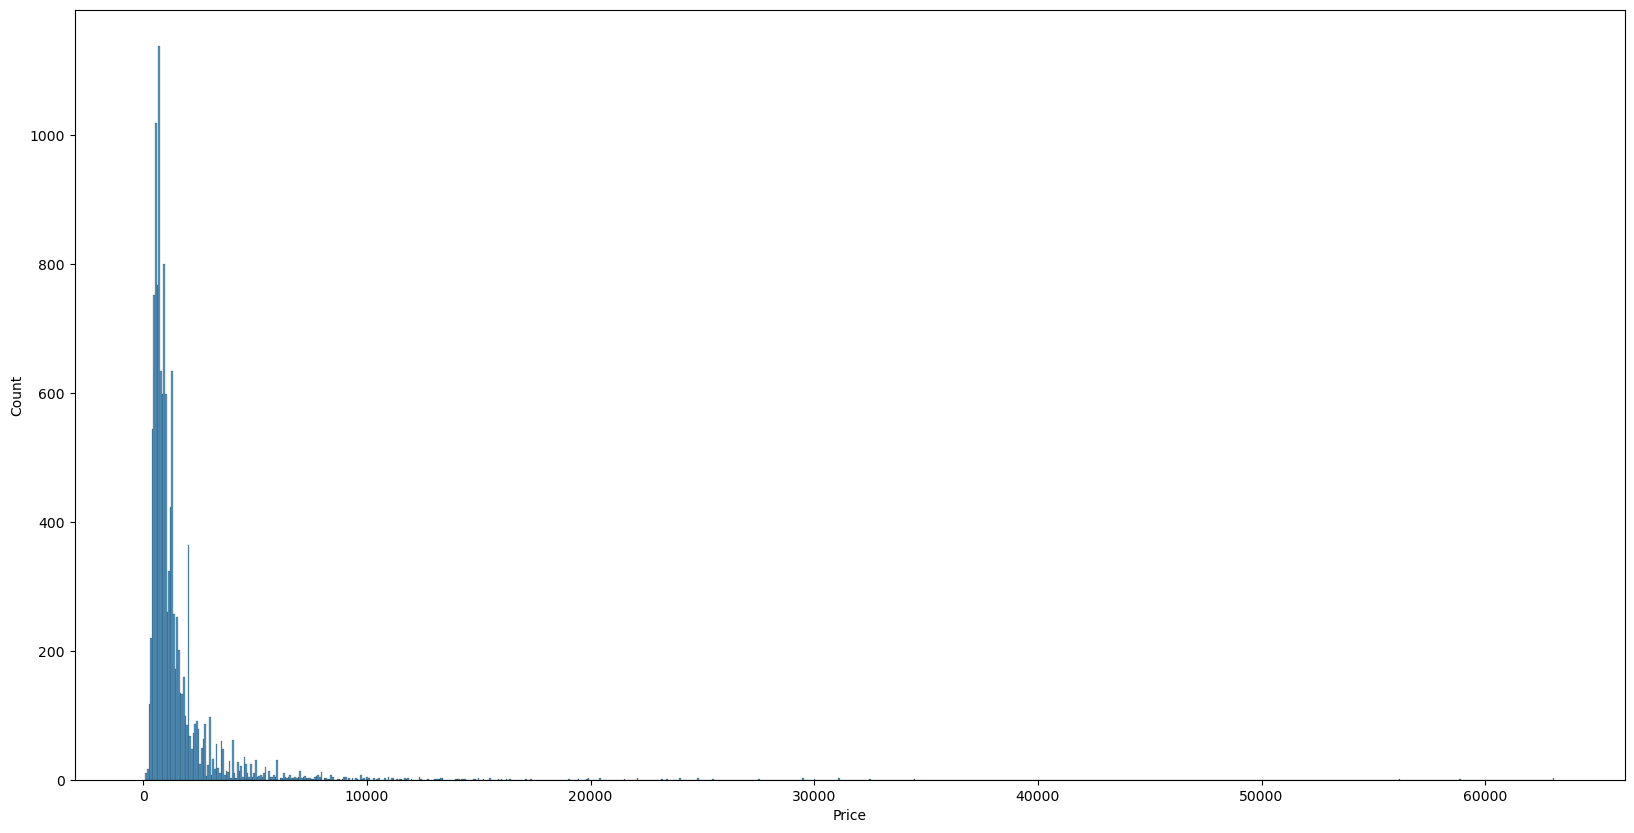

In [16]:
df.rename(columns= {'Price (INR)' : 'Price'}, inplace= True)

plt.figure(figsize= (20,10))
sns.histplot(df["Price"])
plt.show()

In [17]:
df_price1 = df[df["Price"] <= 10000]
df_price2 = df[df["Price"] > 10000]

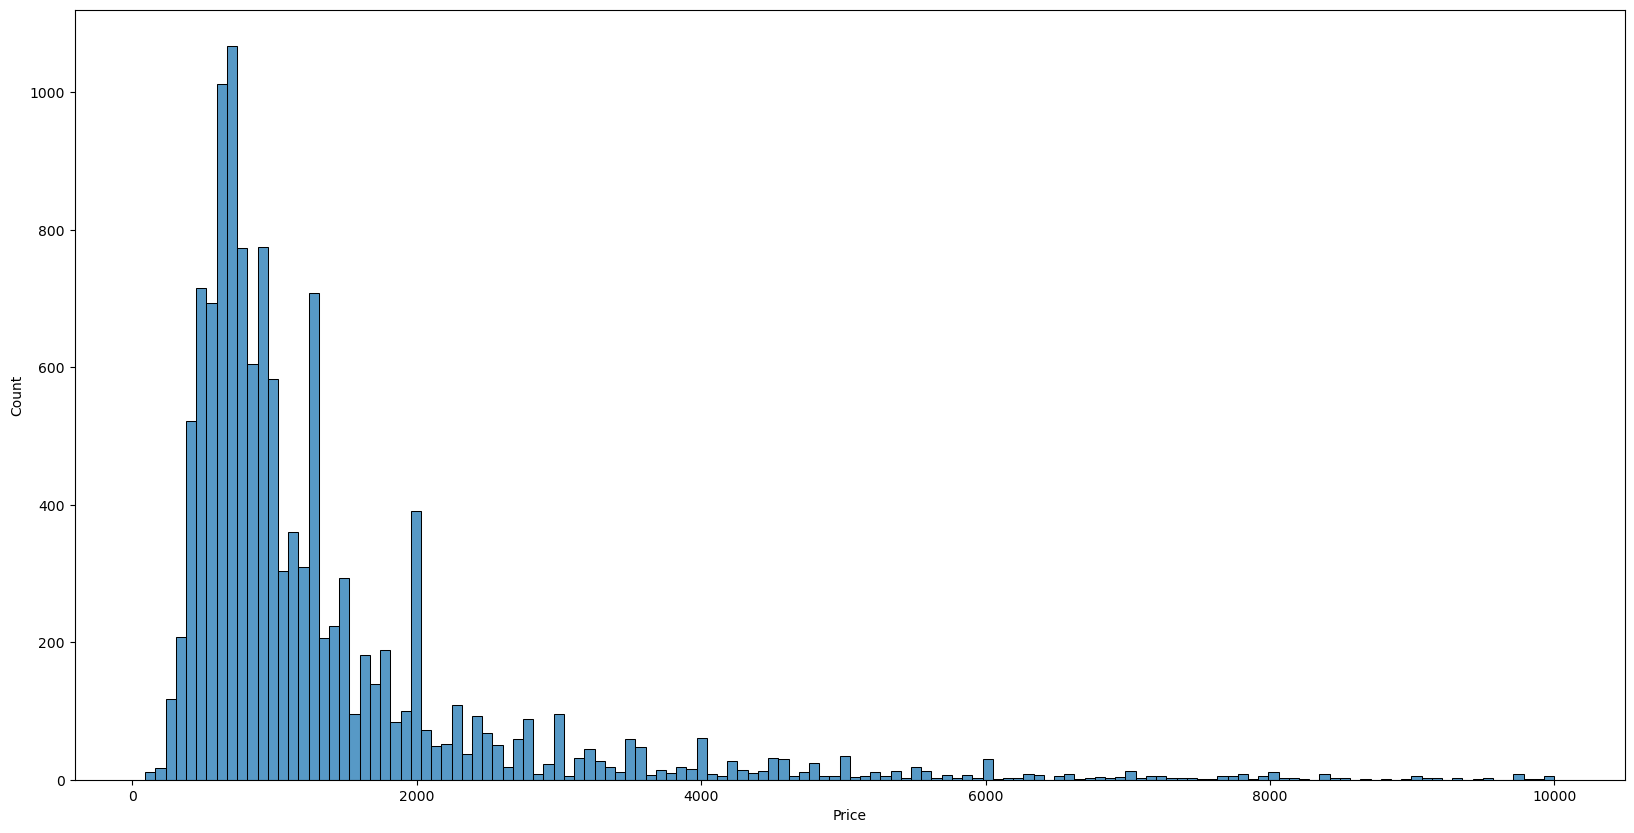

In [18]:
plt.figure(figsize= (20,10))
sns.histplot(df_price1['Price'])
plt.show()

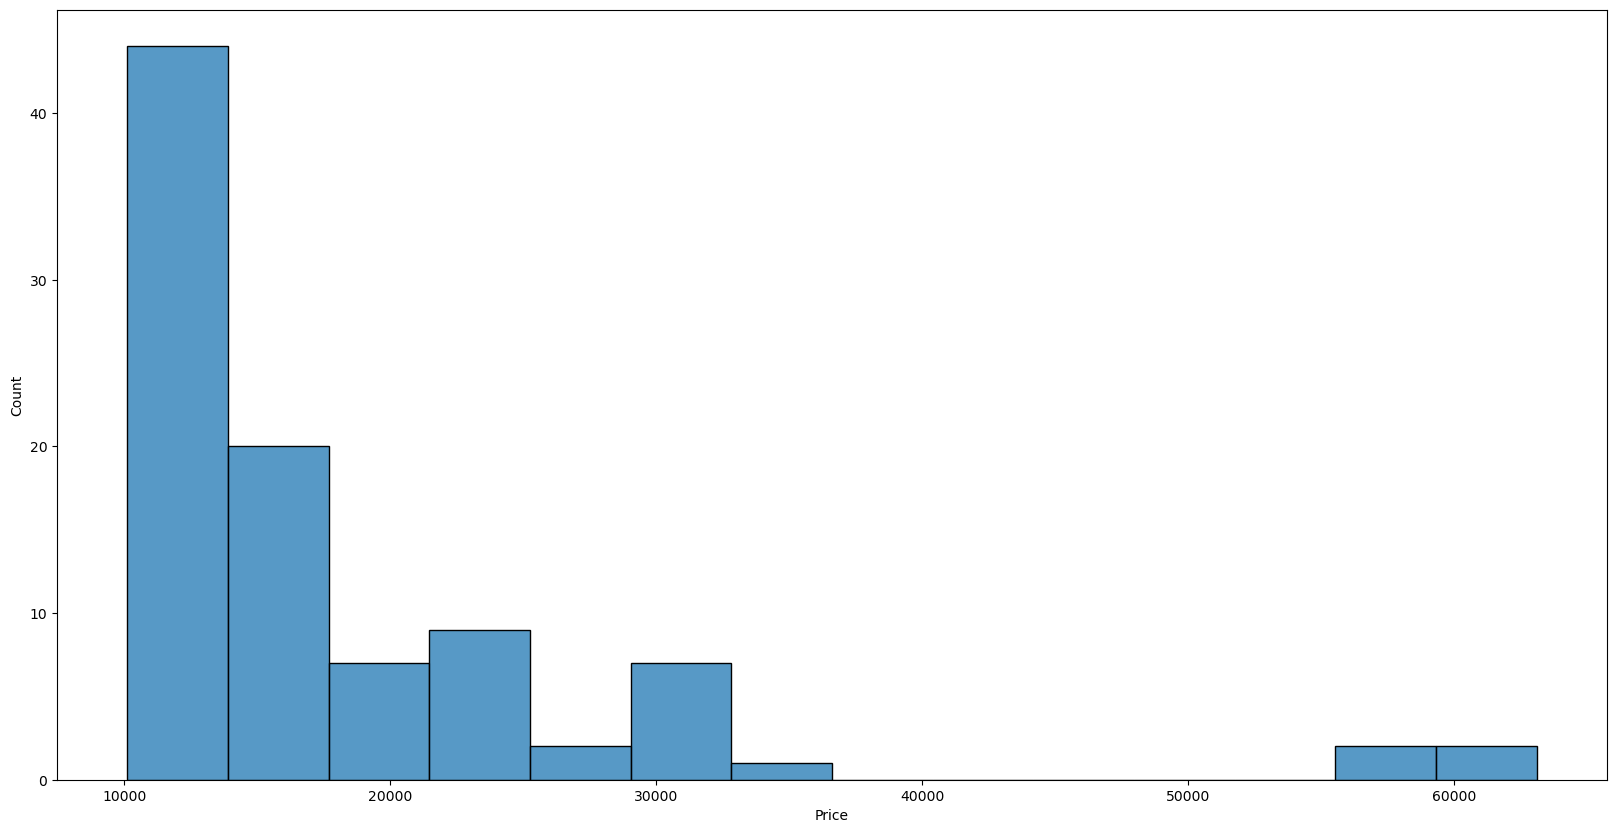

In [19]:
plt.figure (figsize = (20,10))
sns.histplot(df_price2["Price"])
plt.show()

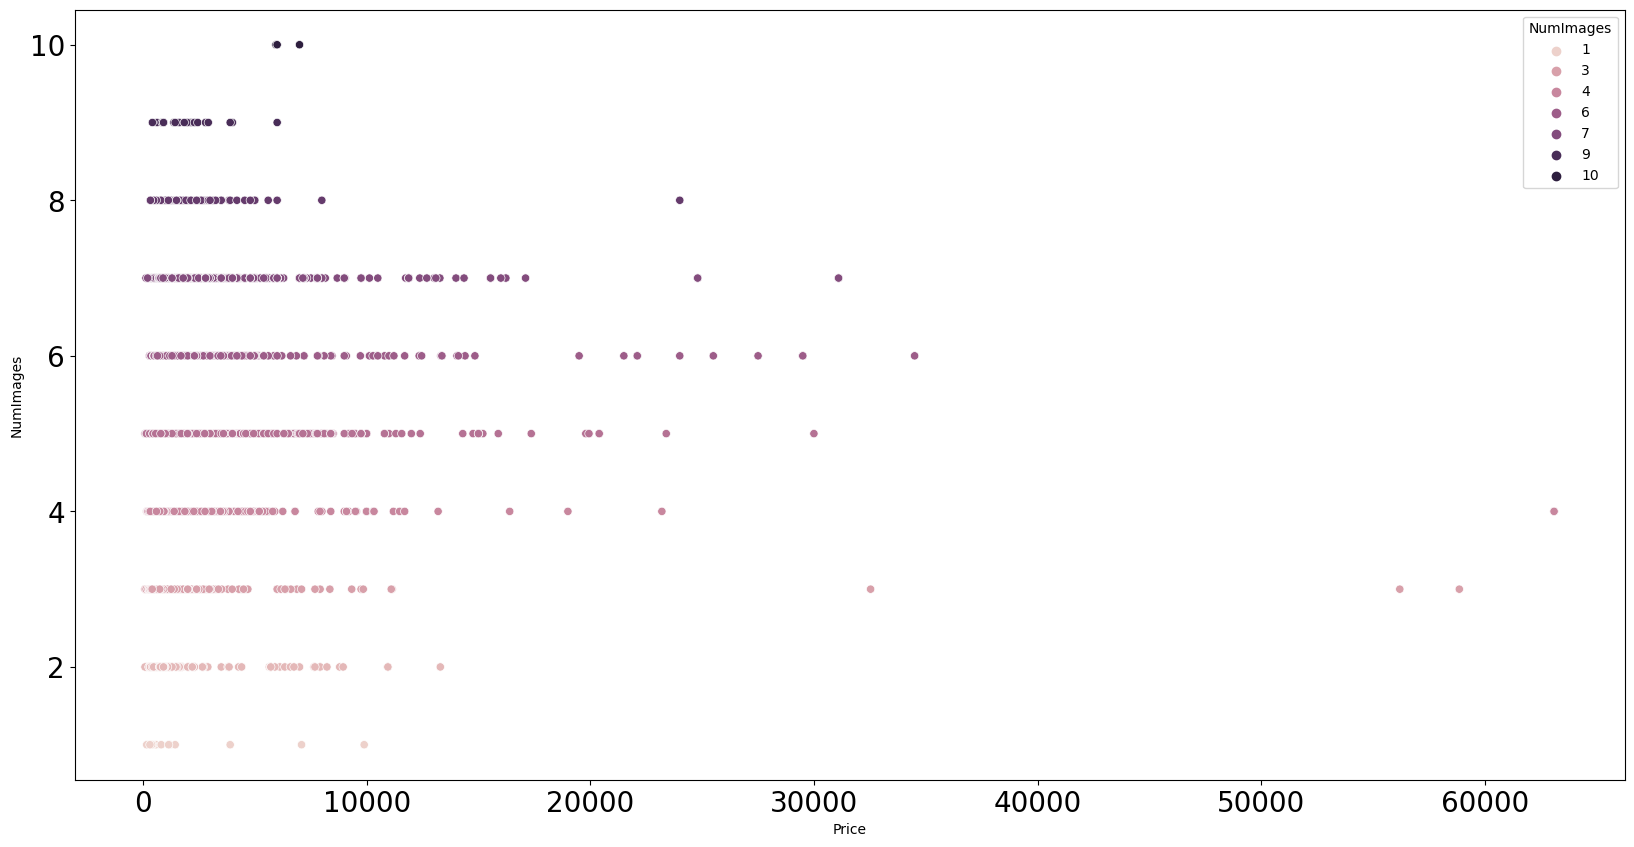

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x = 'Price', y = "NumImages", hue= "NumImages")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

In [21]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [22]:
grp = df.groupby("Gender").agg(Total_Price = ("Price" , np.sum), Mean_Price = ("Price", np.mean),
                              Minimum_Price = ("Price", np.min), Max_Price = ("Price", np.max),
                              Total_records = ("Price", np.size))
grp

,Total_Price,Mean_Price,Minimum_Price,Max_Price,Total_records
Gender,,,,,
Boys,934880,849.890909,224,3999,1100
Girls,414242,941.459091,239,3800,440
Men,7226137,1573.978872,132,58854,4591
Unisex,2567416,2161.124579,90,63090,1188
Unisex Kids,49805,1082.717391,449,1799,46
Women,6952708,1356.361295,134,56192,5126


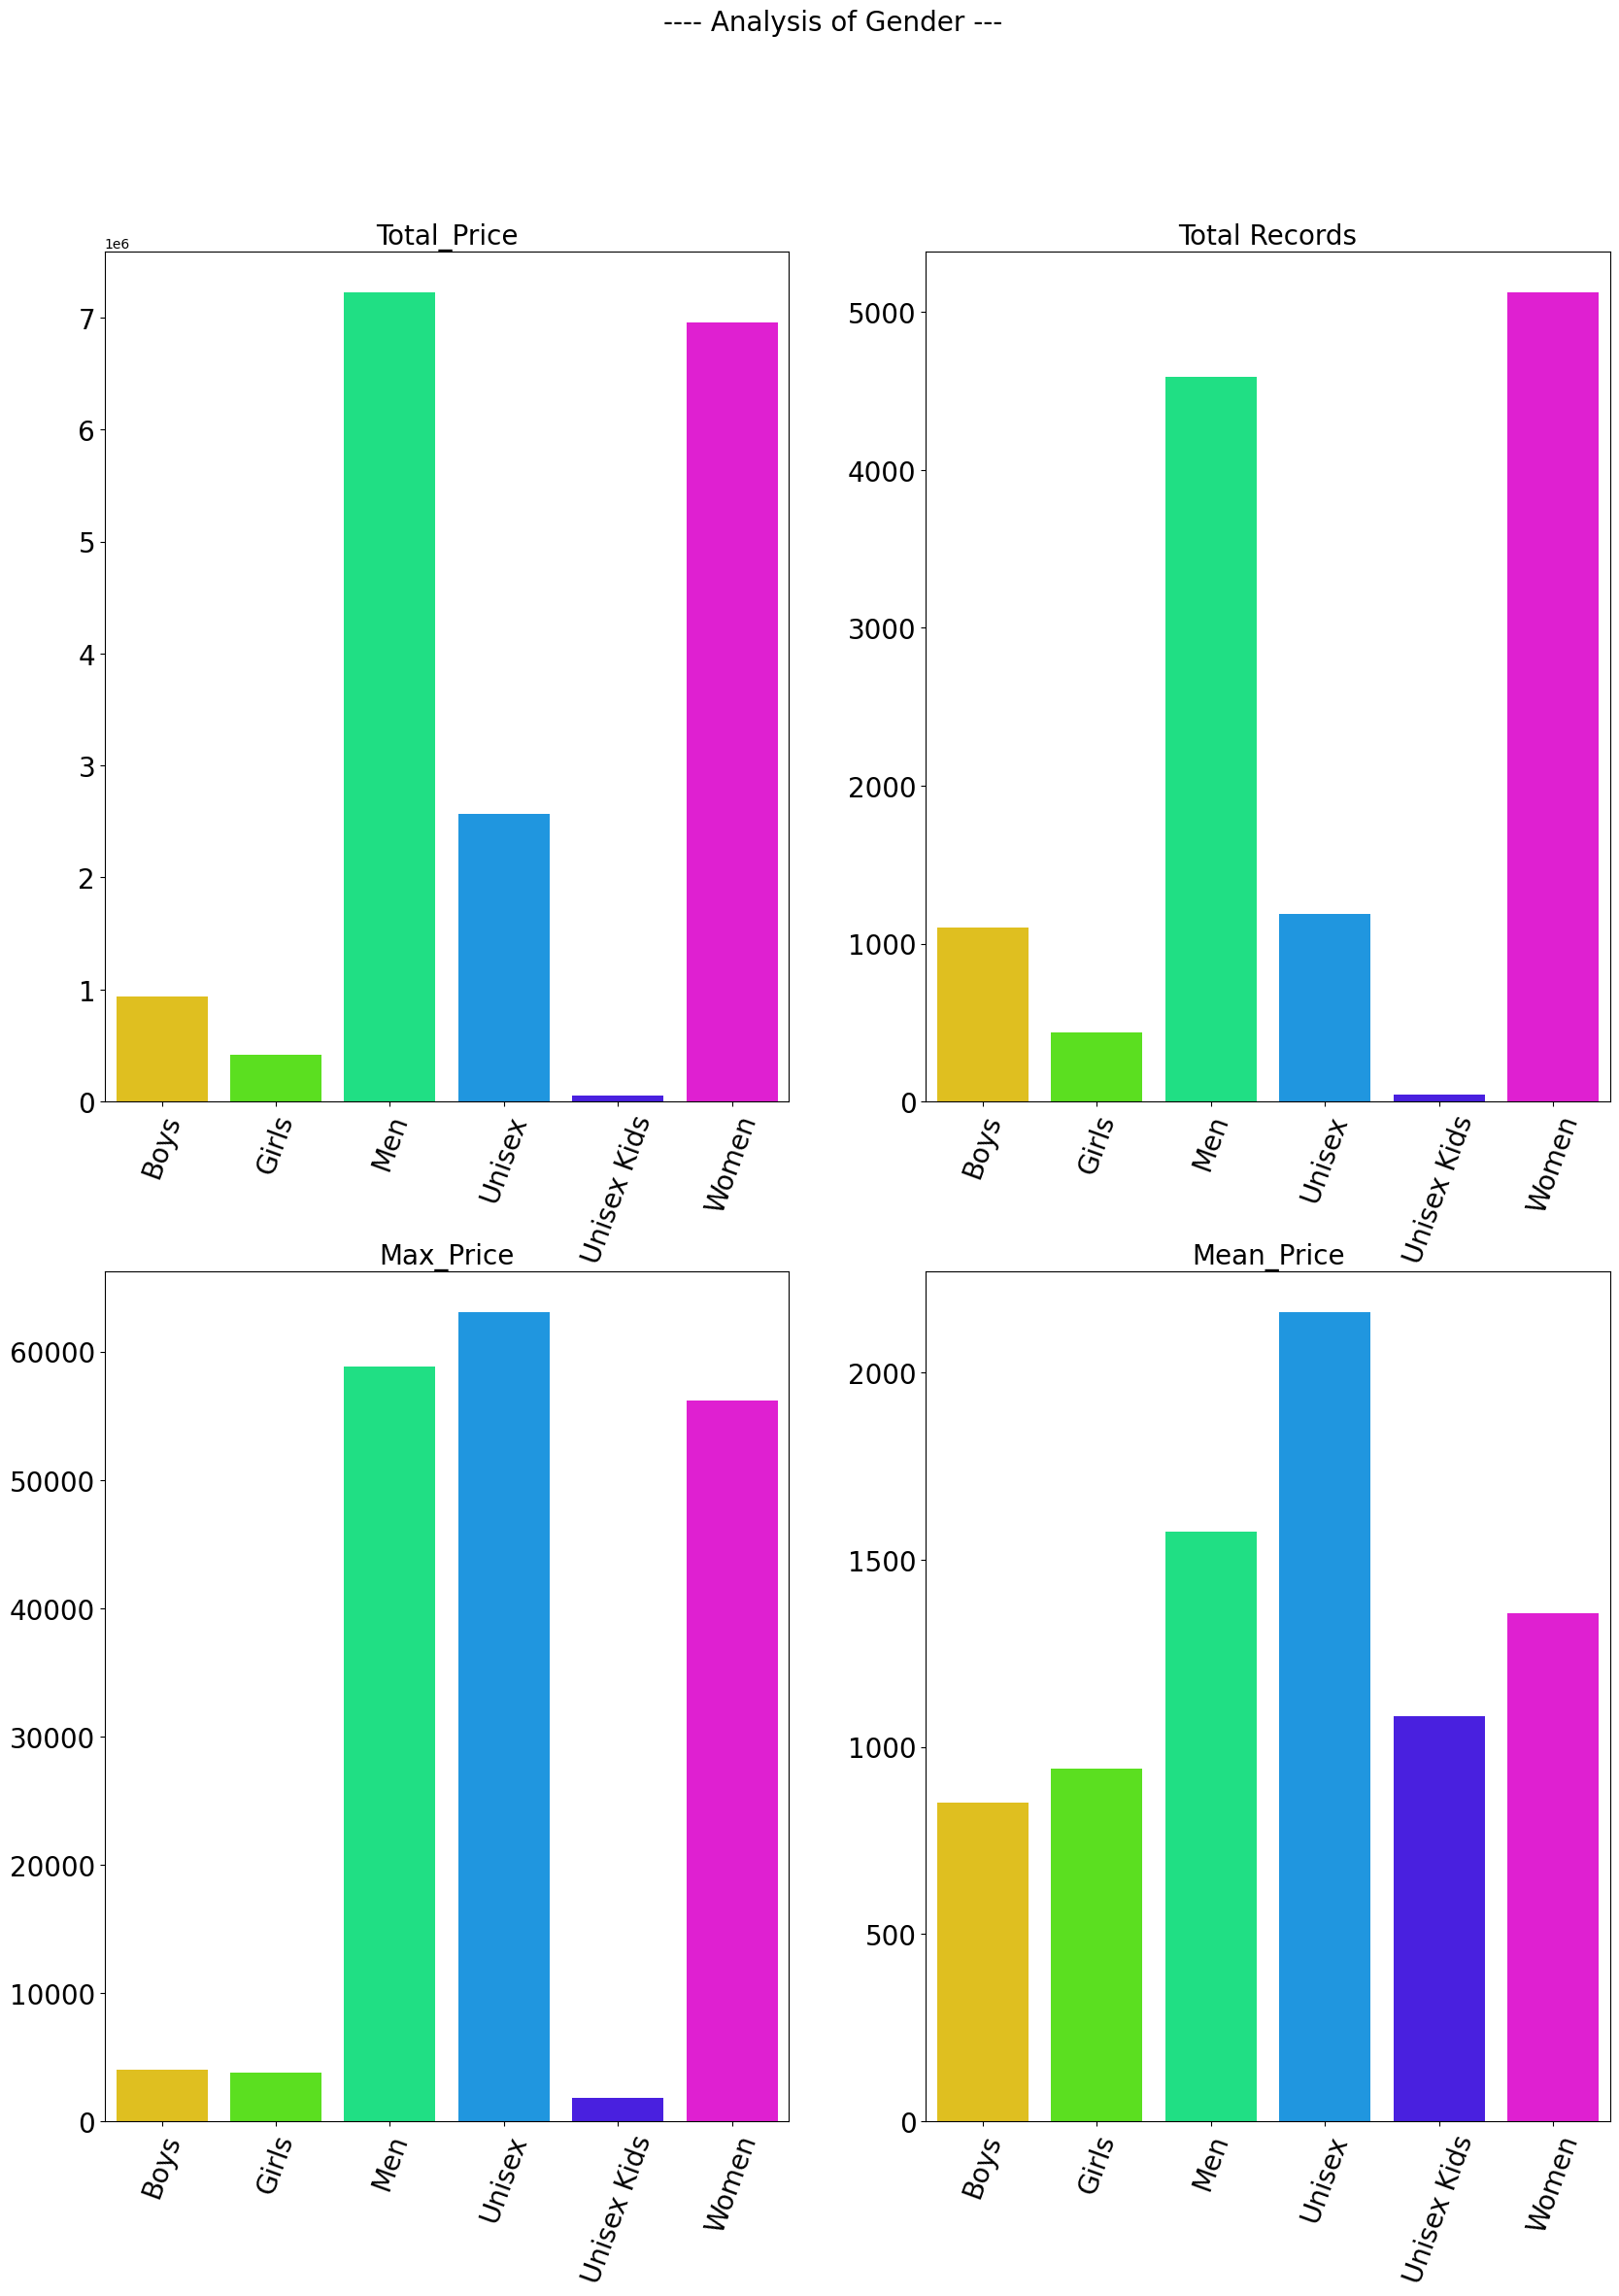

In [23]:
plt.figure(figsize = (20,25))
plt.suptitle("---- Analysis of Gender ---", fontsize = 20)

plt.subplot(2,2,1)
sns.barplot(x = grp.index.values, y = grp.Total_Price.values, palette= "hsv")
plt.title( 'Total_Price', fontsize = 20)
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,2,2)
sns.barplot(x=grp.index.values, y=grp.Total_records.values, palette= "hsv")
plt.title( 'Total Records', fontsize = 20)
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,2,3)
sns.barplot(x = grp.index.values, y = grp.Max_Price.values, palette= "hsv")
plt.title( 'Max_Price', fontsize = 20)
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,2,4)
sns.barplot(x = grp.index.values, y = grp.Mean_Price.values, palette= "hsv")
plt.title( 'Mean_Price', fontsize = 20)
plt.xticks(rotation=70, fontsize = 20)
plt.yticks(fontsize= 20)
plt.show()

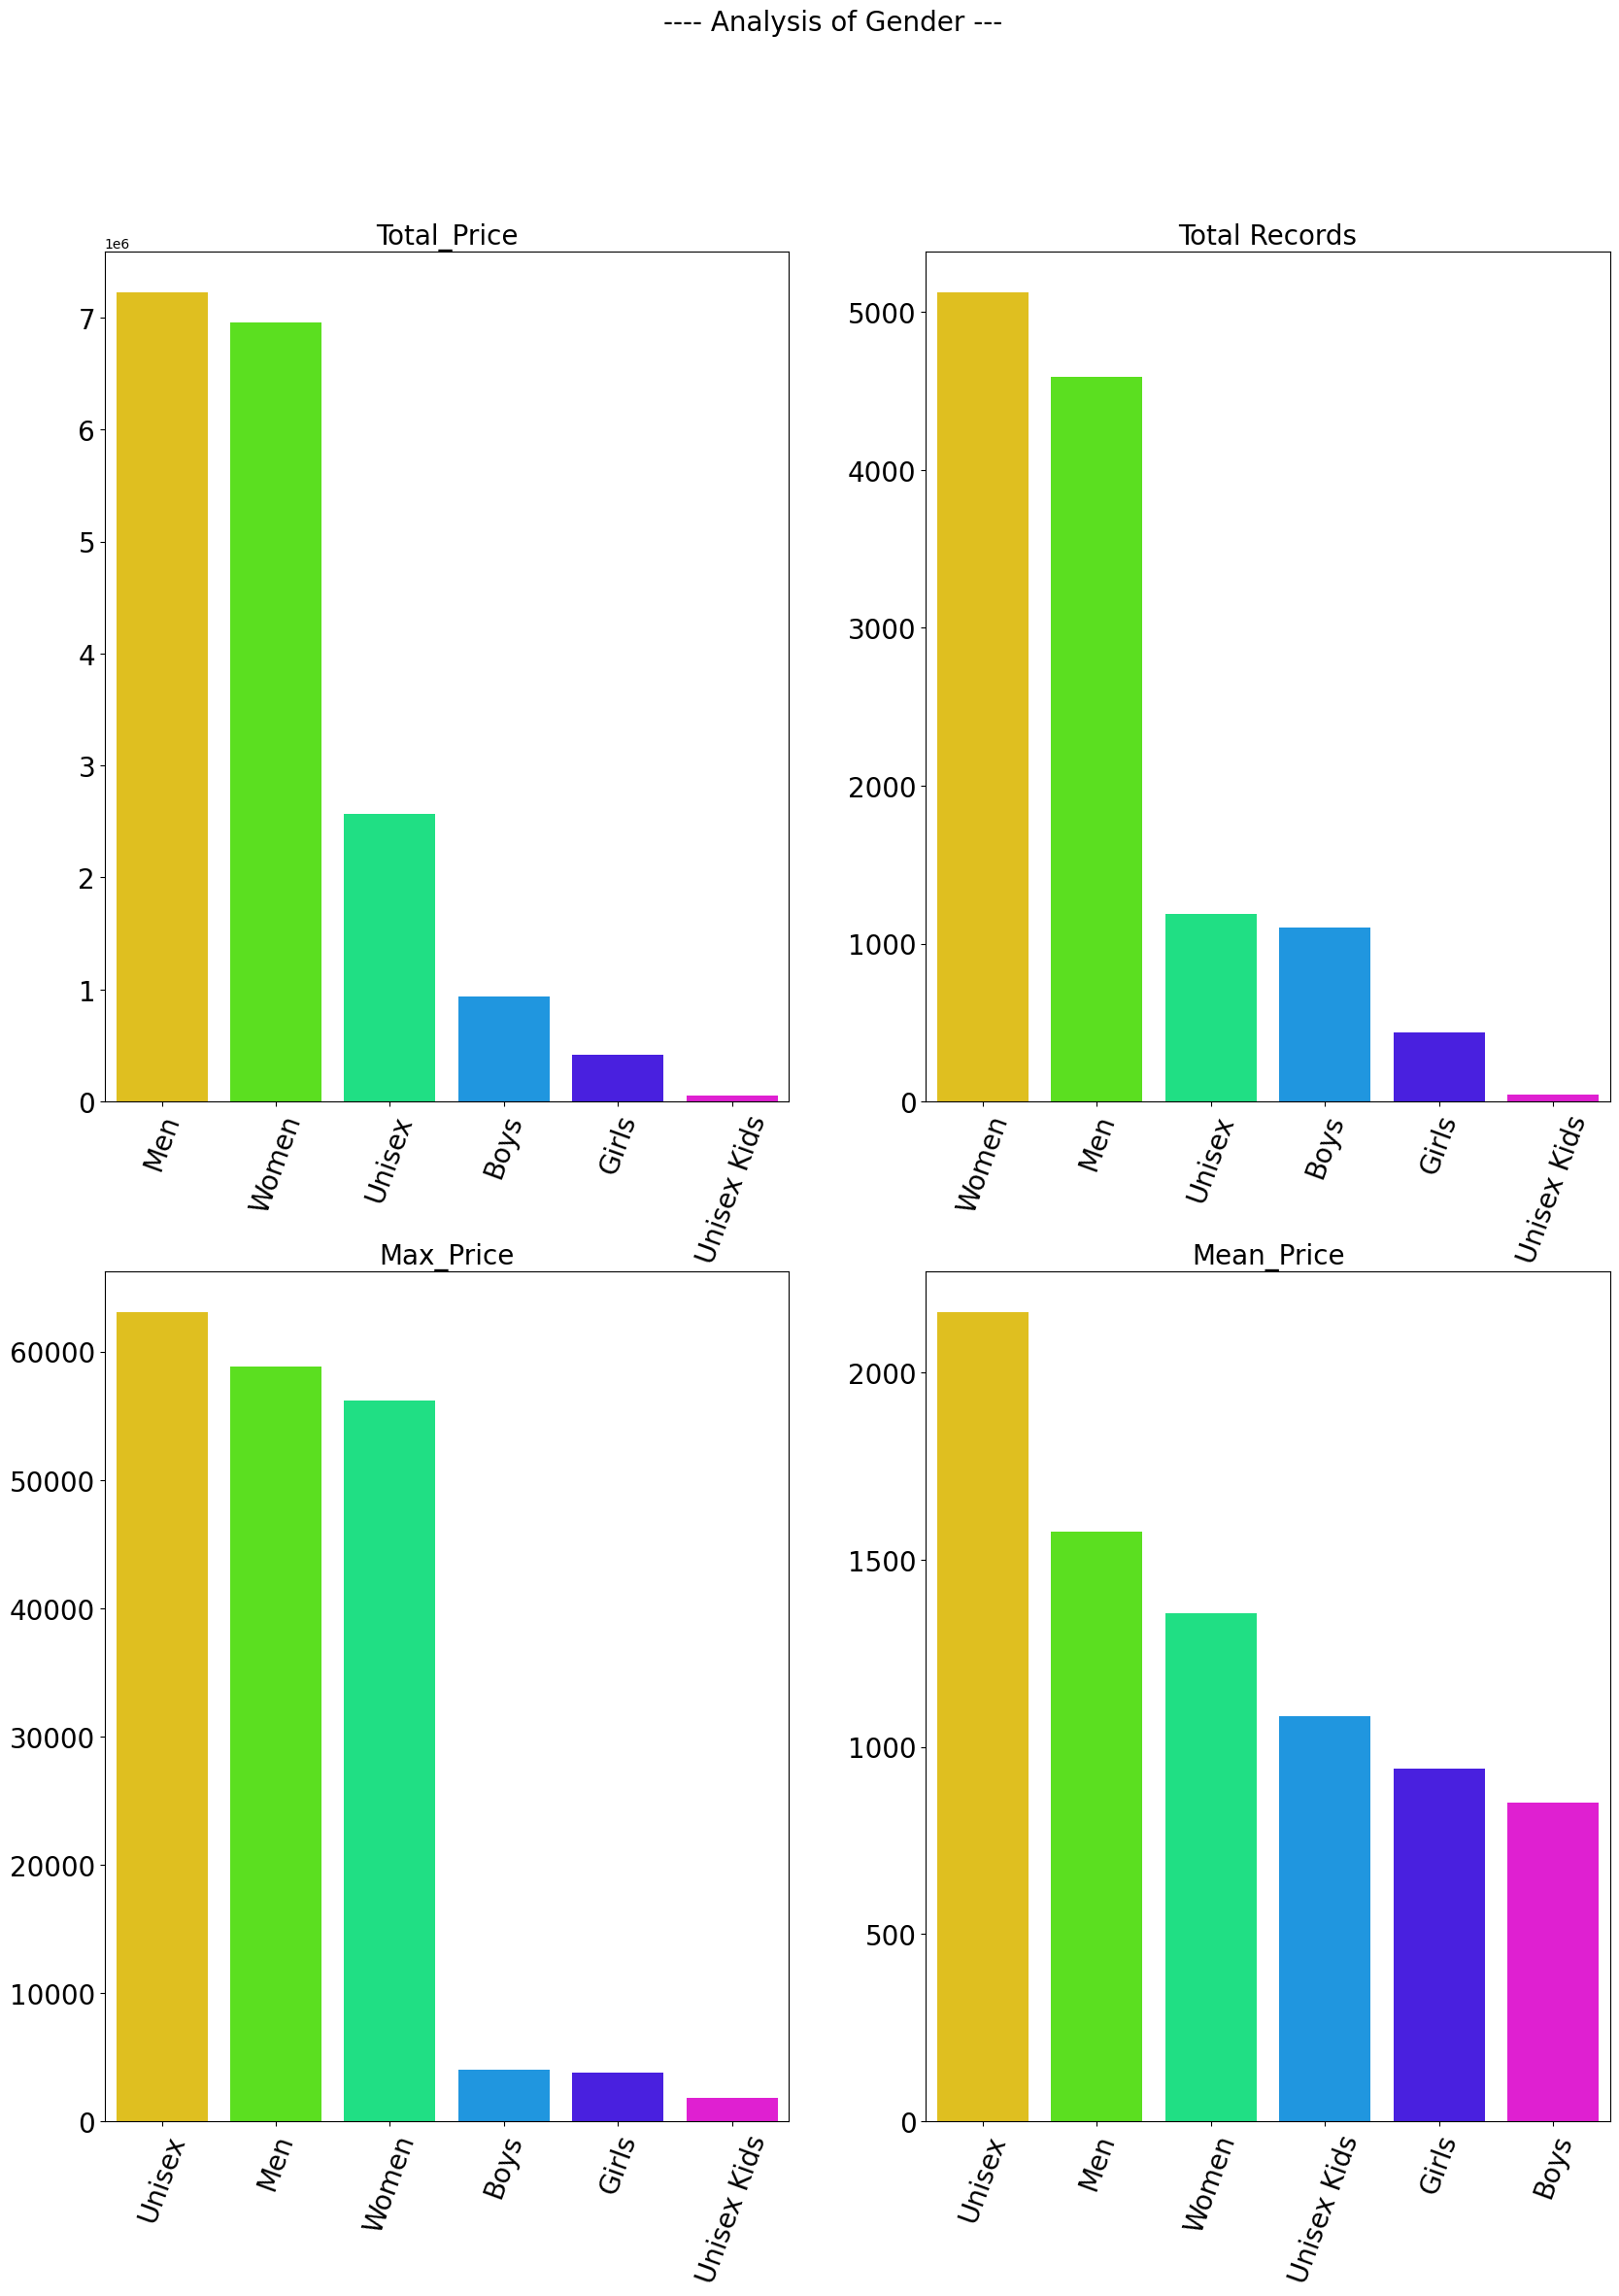

In [24]:


plt.figure(figsize = (20,25))
plt.suptitle("---- Analysis of Gender ---", fontsize = 20)

plt.subplot(2,2,1)
grp = grp.sort_values("Total_Price", ascending= False)
sns.barplot(x = grp.index.values, y = grp.Total_Price.values, palette= "hsv")
plt.title( 'Total_Price', fontsize = 20)
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,2,2)
grp = grp.sort_values("Total_records", ascending= False)
sns.barplot(x=grp.index.values, y=grp.Total_records.values, palette= "hsv")
plt.title( 'Total Records', fontsize = 20)
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,2,3)
grp = grp.sort_values("Max_Price", ascending= False)
sns.barplot(x = grp.index.values, y = grp.Max_Price.values, palette= "hsv")
plt.title( 'Max_Price', fontsize = 20)
plt.xticks(rotation=70, fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,2,4)
grp = grp.sort_values("Mean_Price", ascending= False)
sns.barplot(x = grp.index.values, y = grp.Mean_Price.values, palette= "hsv")
plt.title( 'Mean_Price', fontsize = 20)
plt.xticks(rotation=70, fontsize = 20)
plt.yticks(fontsize= 20)
plt.show()

In [25]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [26]:
grp= df.groupby("ProductBrand").agg(Total_Price = ("Price" , np.sum), Mean_Price = ("Price", np.mean),
                              Minimum_Price = ("Price", np.min), Max_Price = ("Price", np.max),
                              Total_records = ("Price", np.size))
grp

,Total_Price,Mean_Price,Minimum_Price,Max_Price,Total_records
ProductBrand,,,,,
109F,1299,1299.000000,1299,1299,1
20Dresses,3459,1153.000000,1017,1396,3
612 league,11413,713.312500,327,1395,16
7Rainbow,1794,598.000000,587,620,3
AASK,1499,1499.000000,1499,1499,1
...,...,...,...,...,...
shaze,19690,2812.857143,1990,4290,7
shiloh,439,439.000000,439,439,1
t-base,7943,1134.714286,999,1299,7


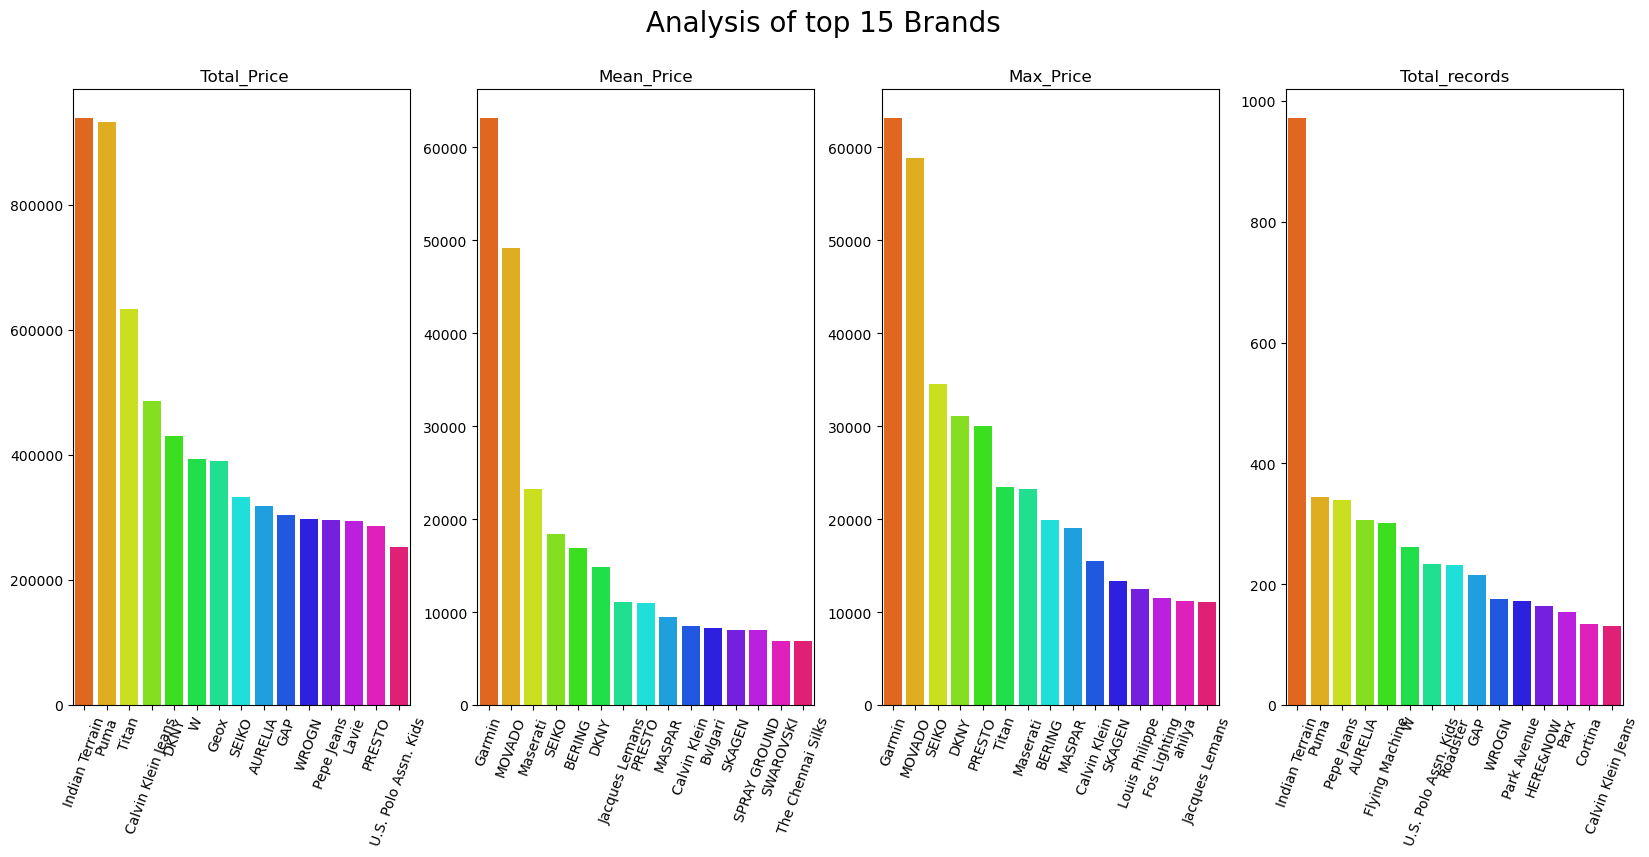

In [27]:
plt.figure(figsize= (20,8))
plt.suptitle("Analysis of top 15 Brands", fontsize= 20)

plt.subplot(1,4,1)
grp= grp.sort_values("Total_Price", ascending= False)
sns.barplot(x= grp.index.values[:15], y= grp.Total_Price.values[:15], palette= "hsv")
plt.title(" Total_Price", fontsize= 12)
plt.xticks(rotation = 70)

plt.subplot(1,4,2)
grp= grp.sort_values("Mean_Price", ascending= False)
sns.barplot(x= grp.index.values[:15], y= grp.Mean_Price.values[:15], palette= "hsv")
plt.title("Mean_Price", fontsize= 12)
plt.xticks(rotation=70)

plt.subplot(1,4,3)
grp= grp.sort_values("Max_Price", ascending= False)
sns.barplot(x= grp.index.values[:15], y= grp.Max_Price.values[:15], palette= "hsv")
plt.title("Max_Price", fontsize= 12)
plt.xticks(rotation=70)

plt.subplot(1,4,4)
grp= grp.sort_values("Total_records", ascending= False)
sns.barplot(x= grp.index.values[:15], y= grp.Total_records.values[:15], palette= "hsv")
plt.title("Total_records", fontsize= 12)
plt.xticks(rotation=70)

plt.show()

In [28]:
grp = df.groupby('PrimaryColor').agg(TotalPrice= ('Price',np.sum), MeanPrice= ('Price', np.mean),
                                    Minprice=("Price", np.min), MaxPrice= ("Price", np.max), TotalRecords = ("Price", np.size))
grp

,TotalPrice,MeanPrice,Minprice,MaxPrice,TotalRecords
PrimaryColor,,,,,
Beige,330873,1402.004237,229,6999,236
Black,3200440,1951.487805,244,63090,1640
Blue,4649698,1350.478652,199,63090,3443
Bronze,1764,588.000000,369,699,3
Brown,728430,1540.021142,299,19500,473
Burgundy,88930,1389.531250,293,9349,64
Charcoal,13065,1306.500000,399,4796,10
Gold,431650,1829.025424,249,11137,236
Green,1105790,1217.830396,247,9749,908


<function matplotlib.pyplot.show(close=None, block=None)>

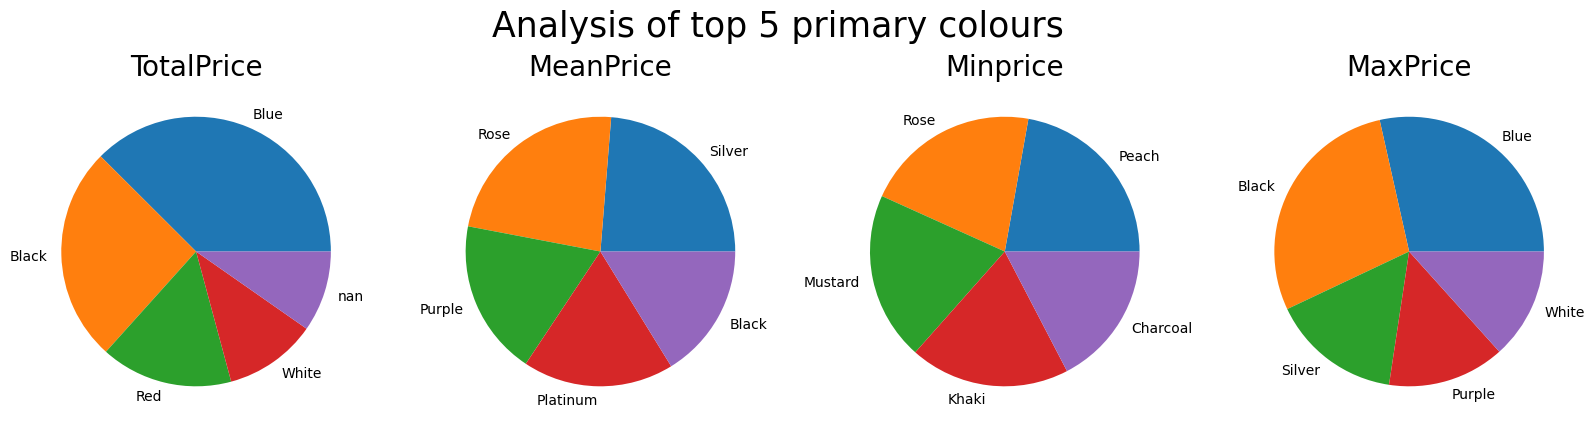

In [29]:
plt.figure(figsize = (20,5))
plt.suptitle("Analysis of top 5 primary colours", fontsize = 25)

plt.subplot(1,4,1)
grp = grp.sort_values('TotalPrice', ascending= False)
plt.pie( labels= grp.index.values[:5], x= grp.TotalPrice.values[:5])
plt.title('TotalPrice', fontsize= 20)

plt.subplot(1,4,2)
grp= grp.sort_values('MeanPrice', ascending= False)
plt.pie(labels= grp.index.values[:5], x= grp.MeanPrice.values[:5])
plt.title('MeanPrice', fontsize= 20)

plt.subplot(1,4,3)
grp= grp.sort_values('Minprice', ascending= False)
plt.pie(labels= grp.index.values[:5], x=grp.Minprice.values[:5])
plt.title('Minprice', fontsize = 20)

plt.subplot(1,4,4)
grp= grp.sort_values('MaxPrice', ascending= False)
plt.pie(labels= grp.index.values[:5], x= grp.MaxPrice.values[:5])
plt.title('MaxPrice', fontsize= 20)
plt.show

In [30]:
grp = df.groupby('ProductBrand').agg(TotalPrice= ('Price', np.sum), MaxPrice= ('Price', np.max), 
                                    MinPrice= ('Price', np.min), MeanPrice= ('Price', np.mean),
                                    TotalRecords= ('Price', np.size))
grp[grp['MeanPrice'] >=10000]

,TotalPrice,MaxPrice,MinPrice,MeanPrice,TotalRecords
ProductBrand,,,,,
BERING,84709,19940,14103,16941.800000,5
DKNY,429620,31100,2665,14814.482759,29
Garmin,126180,63090,63090,63090.000000,2
Jacques Lemans,11100,11100,11100,11100.000000,1
MOVADO,147578,58854,32532,49192.666667,3
Maserati,23200,23200,23200,23200.000000,1
PRESTO,285508,29998,3118,10981.076923,26
SEIKO,331900,34500,4800,18438.888889,18


In [31]:
df.Gender.unique()

array(['Unisex', 'Women', 'Men', 'Boys', 'Girls', 'Unisex Kids'],
      dtype=object)

In [32]:
df['NewGender']= df['Gender'].copy()
df['NewGender'].replace({'Boys':'Men','Girls':'Women', 'Unisex Kids': 'Unisex'}, inplace= True)
df['NewGender'].value_counts()

Men       5691
Women     5566
Unisex    1234
Name: NewGender, dtype: int64

In [33]:
grp= df.groupby("NewGender").agg(TotalPrice= ('Price', np.sum), MeanPrice= ('Price', np.mean),
                                MaxPrice= ('Price', np.max), MinPrice= ('Price', np.min))
grp

,TotalPrice,MeanPrice,MaxPrice,MinPrice
NewGender,,,,
Men,8161017,1434.021613,58854,132
Unisex,2617221,2120.924635,63090,90
Women,7366950,1323.562702,56192,134


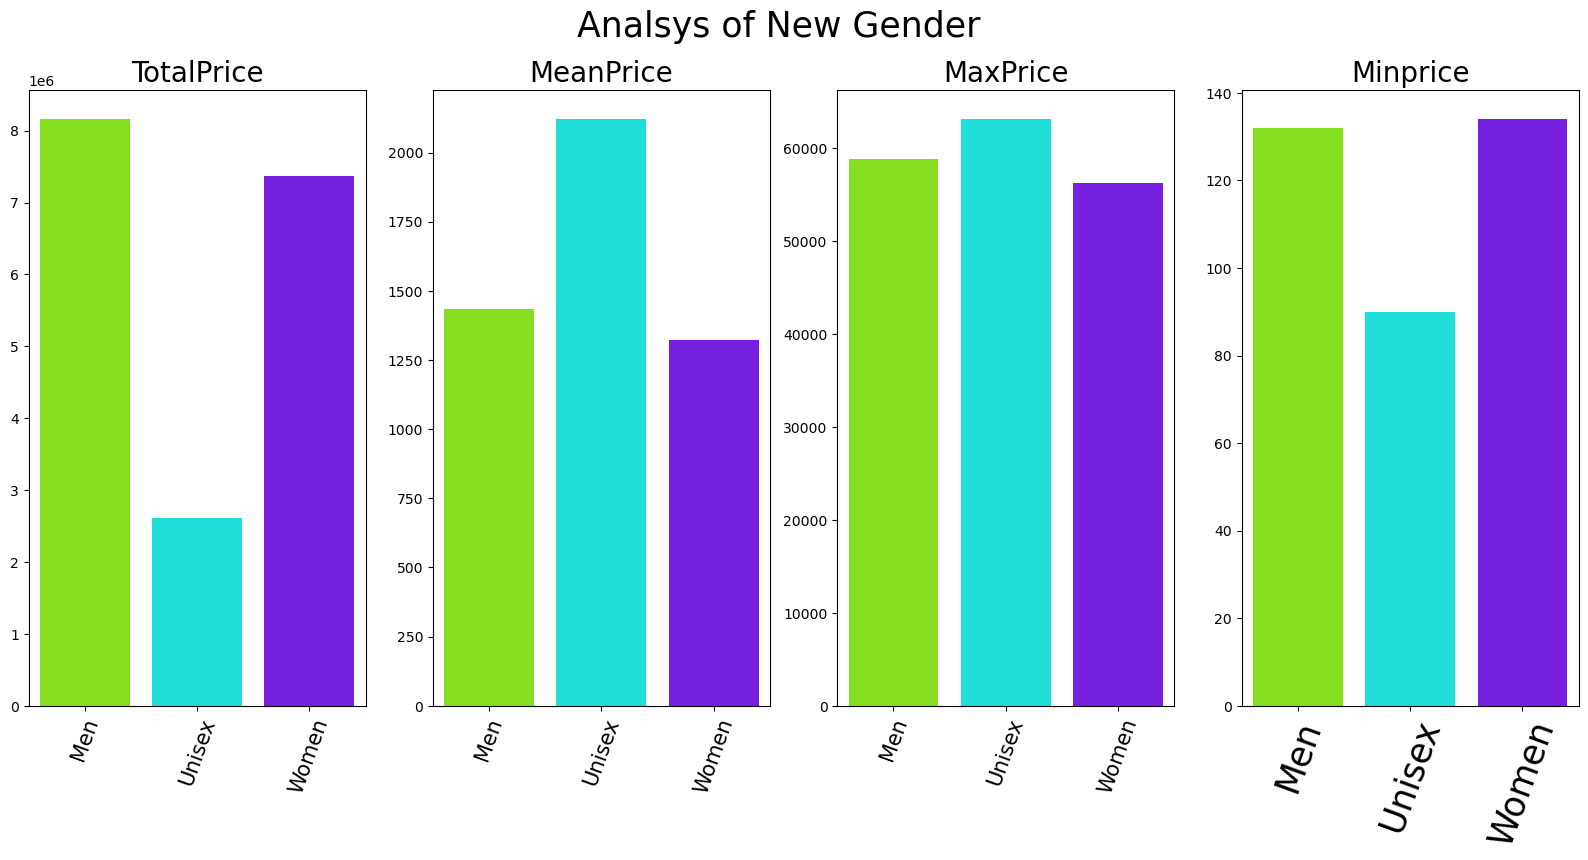

In [34]:
plt.figure(figsize= (20,8))
plt.suptitle('Analsys of New Gender', fontsize= 25)

plt.subplot(1,4,1)
sns.barplot(x= grp.index.values, y= grp.TotalPrice.values, palette= 'hsv')
plt.title('TotalPrice', fontsize= 20)
plt.xticks(rotation= 70, fontsize= 15)

plt.subplot(1,4,2)
sns.barplot(x= grp.index.values, y= grp.MeanPrice.values, palette= 'hsv')
plt.title('MeanPrice', fontsize= 20)
plt.xticks(rotation= 70, fontsize= 15)

plt.subplot(1,4,3)
sns.barplot(x= grp.index.values, y = grp.MaxPrice.values, palette= 'hsv')
plt.title('MaxPrice', fontsize= 20)
plt.xticks(rotation= 70, fontsize= 15)

plt.subplot(1,4,4)
sns.barplot(x= grp.index.values, y= grp.MinPrice.values, palette= 'hsv')
plt.title('Minprice', fontsize=20)
plt.xticks(rotation= 70, fontsize= 25)

plt.show()


In [35]:
unisex= df[df['NewGender']== 'Unisex']
unisex.shape
unisex.head()

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,Unisex
9,10017421,DKNY Unisex Black Large Trolley Bag,DKNY,Unisex,17360,5,"Black solid large trolley bag, secured with a ...",Black,Unisex
16,10003803,Homesake Gold-Toned & White Solid Handcrafted ...,Homesake,Unisex,1620,5,Type: Handcrafted Table Lamp with ShadeColour:...,White,Unisex
17,10012765,SEJ by Nisha Gupta Set of 6 Mustard & Blue Pri...,SEJ by Nisha Gupta,Unisex,899,4,Set content: 6 table mats Shape: Rectangle Col...,Blue,Unisex
22,10012795,SEJ by Nisha Gupta Set of 6 Multicoloured Prin...,SEJ by Nisha Gupta,Unisex,899,4,Set content: 6 table matsShape: RectangleColou...,Red,Unisex


In [36]:
grp= unisex.groupby('PrimaryColor').agg(TotalPrice= ('Price', np.sum), MeanPrice= ('Price', np.mean),
                                       MaxPrice= ('Price', np.max), MinPrice= ('Price', np.min),
                                       TotalRecords= ('Price', np.size))
grp

,TotalPrice,MeanPrice,MaxPrice,MinPrice,TotalRecords
PrimaryColor,,,,,
Beige,22777,1265.388889,3325,424,18
Black,656041,4024.791411,63090,349,163
Blue,451136,2138.085308,63090,247,211
Brown,73262,1110.030303,3600,349,66
Gold,36739,2041.055556,3640,399,18
Green,111724,931.033333,2639,247,120
Grey,149938,2541.322034,14998,349,59
Lavender,1713,571.000000,828,275,3
Maroon,25778,1982.923077,9765,489,13


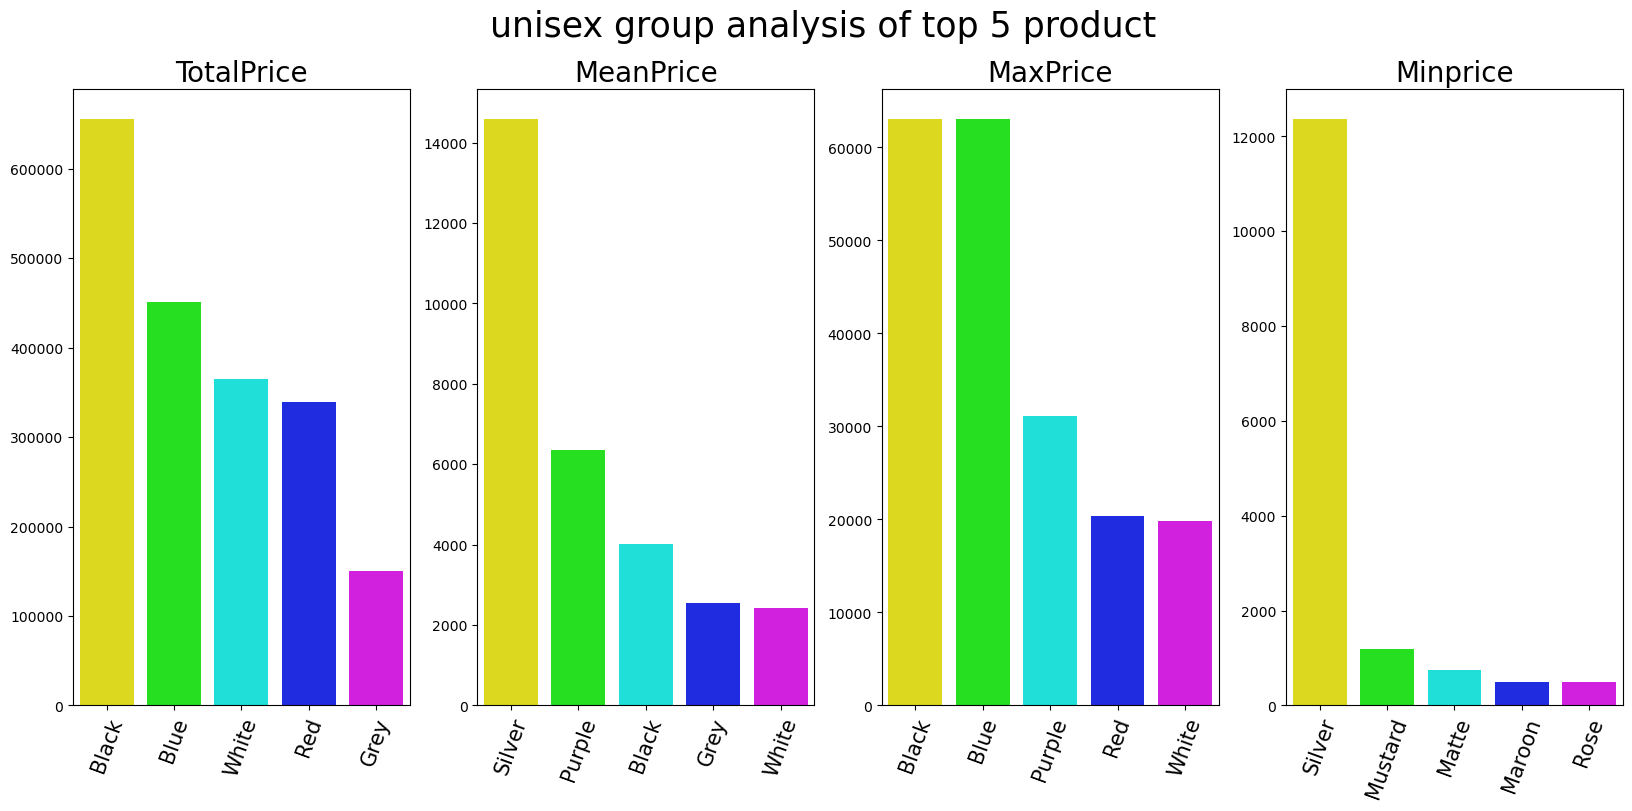

In [37]:
plt.figure(figsize= (20,8))
plt.suptitle('unisex group analysis of top 5 product', fontsize= 25)

plt.subplot(1,4,1)
grp= grp.sort_values('TotalPrice', ascending= False)
sns.barplot(x= grp.index.values[:5], y= grp.TotalPrice.values[:5], palette= 'hsv')
plt.title('TotalPrice', fontsize= 20)
plt.xticks(rotation= 70, fontsize= 15)

plt.subplot(1,4,2)
grp= grp.sort_values('MeanPrice', ascending= False)
sns.barplot(x= grp.index.values[:5], y= grp.MeanPrice.values[:5], palette= 'hsv')
plt.title('MeanPrice', fontsize= 20)
plt.xticks(rotation= 70, fontsize= 15)

plt.subplot(1,4,3)
grp= grp.sort_values('MaxPrice', ascending= False)
sns.barplot(x= grp.index.values[:5], y = grp.MaxPrice.values[:5], palette= 'hsv')
plt.title('MaxPrice', fontsize= 20)
plt.xticks(rotation= 70, fontsize= 15)

plt.subplot(1,4,4)
grp= grp.sort_values('MinPrice', ascending= False)
sns.barplot(x= grp.index.values[:5], y= grp.MinPrice.values[:5], palette= 'hsv')
plt.title('Minprice', fontsize=20)
plt.xticks(rotation= 70, fontsize= 15)

plt.show()


In [38]:
df['Descriptionlenghth']= df['Description'].apply(lambda x : len(str(x)))
df

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender,Descriptionlenghth
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,Unisex,401
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,Women,620
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,Women,133
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,Men,340
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,Men,122
...,...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,Men,280
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,Women,210
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,Women,84
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,nan,Men,50


In [40]:
rows = 0

for i in range(df.shape[0]) : 
    if str(df.loc[i, "PrimaryColor"]).lower() in str( df.loc[i, "ProductName"] ).lower() : 
        rows = rows + 1
print(rows)
print( rows / df.shape[0]  * 100)

11597
92.84284684973181


In [41]:
rows = 0

for i in range(df.shape[0]) : 
    if str(df.loc[i, "Gender"]).lower() in str( df.loc[i, "ProductName"] ).lower() : 
        rows = rows + 1
print(rows)
print( rows / df.shape[0]  * 100)

10163
81.36258105836201


In [42]:
rows = 0

for i in range(df.shape[0]) : 
    if str(df.loc[i, "ProductBrand"]).lower() in str( df.loc[i, "ProductName"] ).lower() : 
        rows = rows + 1
print(rows)
print( rows / df.shape[0]  * 100)

12467
99.80786166039547


In [43]:
rows = 0

for i in range(df.shape[0]) : 
    if str(df.loc[i, "PrimaryColor"]).lower() in str( df.loc[i, "Description"] ).lower() : 
        rows = rows + 1
print(rows)
print( rows / df.shape[0]  * 100)

10968
87.80722119926348


In [44]:
rows = 0

for i in range(df.shape[0]) : 
    if str(df.loc[i, "Gender"]).lower() in str( df.loc[i, "Description"] ).lower() : 
        rows = rows + 1
print(rows)
print( rows / df.shape[0]  * 100)

396
3.1702826034745017


In [45]:
rows = 0

for i in range(df.shape[0]) : 
    if str(df.loc[i, "ProductBrand"]).lower() in str( df.loc[i, "Description"] ).lower() : 
        rows = rows + 1
print(rows)
print( rows / df.shape[0]  * 100)

995
7.965735329437194
